Install All Dependencies


In [ ]:
!pip -r requirements.txt

Import All Libraries


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.preprocessing import image

Preprocess Images

In [16]:
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 204 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


Simple checking of the image classes

In [17]:
train_data.class_indices

{'invalid': 0, 'valid': 1}

Constructing Simple Model

In [17]:

model = Sequential([
    Conv2D(32, (3, 3), activation='tanh', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [18]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 7s/step - accuracy: 0.5646 - loss: 1.5852 - val_accuracy: 0.6327 - val_loss: 1.3220
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.6666 - loss: 1.1138 - val_accuracy: 0.6327 - val_loss: 1.0817
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.6083 - loss: 1.0368 - val_accuracy: 0.6327 - val_loss: 0.8608
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.6891 - loss: 0.8098 - val_accuracy: 0.6327 - val_loss: 0.7255
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.6154 - loss: 0.8288 - val_accuracy: 0.6327 - val_loss: 0.6660
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.5140 - loss: 0.9219 - val_accuracy: 0.6327 - val_loss: 0.6575
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.4816 - loss: 0.9003 - val_accuracy: 0.6327 - val_loss: 0.6584
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.5610 - loss: 0.7818 - val_accuracy: 0.6327 - val_loss: 0.6577
Epoch 9/

Evaluate the Model

In [19]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6301 - loss: 0.6589
Validation Accuracy: 63.27%


Save Model

In [20]:
model.save("arnis_cnn_tanh_model.h5")

Predict Test

[[[0.14901961 0.12941177 0.11372549]
  [0.18039216 0.14509805 0.14901961]
  [0.17254902 0.13725491 0.14117648]
  ...
  [0.15686275 0.08235294 0.05490196]
  [0.15686275 0.08235294 0.05490196]
  [0.15686275 0.08235294 0.05490196]]

 [[0.21176471 0.19607843 0.18431373]
  [0.21176471 0.1882353  0.1882353 ]
  [0.22352941 0.1882353  0.19215687]
  ...
  [0.15686275 0.08235294 0.05490196]
  [0.17254902 0.09019608 0.07058824]
  [0.16078432 0.07843138 0.05882353]]

 [[0.2784314  0.2784314  0.27058825]
  [0.20392157 0.2        0.19215687]
  [0.21960784 0.19607843 0.19607843]
  ...
  [0.16470589 0.08627451 0.05882353]
  [0.16470589 0.08235294 0.0627451 ]
  [0.18431373 0.09019608 0.07450981]]

 ...

 [[0.44313726 0.5372549  0.64705884]
  [0.2901961  0.4392157  0.6156863 ]
  [0.29803923 0.46666667 0.6313726 ]
  ...
  [0.50980395 0.47058824 0.43529412]
  [0.58431375 0.54901963 0.5137255 ]
  [0.5764706  0.54509807 0.5019608 ]]

 [[0.48235294 0.56078434 0.6666667 ]
  [0.35686275 0.5411765  0.74509805]


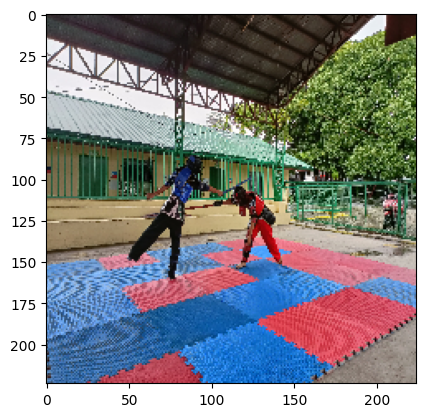

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_strike(image_path):
    model = load_model('output/models/CNN_v2.keras')
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Valid Strike" if prediction > 0.5 else "Invalid Strike"
    print(f"Prediction: {label} ({prediction:.2f})")

    plt.imshow(img)


predict_strike("dataset/test/valid/IMG20250705135807.jpg")
